# Loan predictions
## Problem Statement
##### We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset here. These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well.

|Variable| Description|
|--- |---|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|\n",
|Married| Applicant married (Y/N)|\n",
|Dependents| Number of dependents|\n",
|Education| Applicant Education (Graduate/ Under Graduate)|\n",
|Self_Employed| Self employed (Y/N)|\n",
|ApplicantIncome| Applicant income|\n",
|CoapplicantIncome| Coapplicant income|\n",
|LoanAmount| Loan amount in thousands|\n",
|Loan_Amount_Term| Term of loan in months|\n",
|Credit_History| credit history meets guidelines|\n",
|Property_Area| Urban/ Semi Urban/ Rural|\n",
|Loan_Status| Loan approved (Y/N)\n",

# Part 1

### Explore the problem in following stages:
1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data
## 1. Hypothesis Generation
##### Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
##### Which applicants are more likely to get a loan

- Applicants having a credit history
- Applicants with higher applicant and co-applicant incomes
- Applicants with higher education level
- Properties in urban areas with high growth perspectives
- Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

##### Other hypotheses I would have prior to looking at the data:

- Applicants with other assets
- Applicants with strong income relative to loan size
- Applicants applying for loans with high return potential (Student loan/Mortgage)

## 2. Data Exploration
##### Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('~/Desktop/desktop-tutorial/Week_7/Day_4/data.csv')
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check for missing values

In [4]:
# Create dataframe with total sum of missing values
total = df.isnull().sum().sort_values(ascending=False)

# Create dataframe with percent of missing values
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

# Concatenate both dataframes to get the full picture of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


### Explore the Numerical data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


1. How many Applicants have a credit history?

In [7]:
# Get value counts for Credit History
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

##### We can see that 475 applicants have a credit history, 89 do not, and 50 have missing information within the training set.

2. Is the ApplicantIncome distribution in line with your expectation?

In [9]:
# Create dataframe with only numerical data 
# Credit history is a binary variable and will be treated categorically.
# Loan Amount Term is also a categorical variable

df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


In [14]:
# Convert ApplicantIncome to float type for standardization purposes

df_num['ApplicantIncome'] = df_num['ApplicantIncome'].astype(np.float64)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_60486/3644712913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['ApplicantIncome'] = df_num['ApplicantIncome'].astype(np.float64)


In [15]:
# View the descriptive statistics for the numerical variables

df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

### Exploring Categorical Data

In [16]:
# Create a dataframe with only categorical variables

df_cat = df[['Gender', 'Married', 'Dependents', 'Education',
             'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban
4,Male,No,0,Graduate,No,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban


In [17]:
# Replace Credit History integers with 'Yes', 'No' strings

df_cat['Credit_History'] = df_cat['Credit_History'].replace({1: 'Yes',
                                                             0: 'No'
                                                            }
                                                           )
df_cat

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_60486/2198597211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Credit_History'] = df_cat['Credit_History'].replace({1: 'Yes',


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,360.0,Yes,Urban
1,Male,Yes,1,Graduate,No,360.0,Yes,Rural
2,Male,Yes,0,Graduate,Yes,360.0,Yes,Urban
3,Male,Yes,0,Not Graduate,No,360.0,Yes,Urban
4,Male,No,0,Graduate,No,360.0,Yes,Urban
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,Yes,Rural
610,Male,Yes,3+,Graduate,No,180.0,Yes,Rural
611,Male,Yes,1,Graduate,No,360.0,Yes,Urban
612,Male,Yes,2,Graduate,No,360.0,Yes,Urban


In [18]:
# Loan Amount Term is also a categorical variable.
# Replace float variables with a categorical equivalent

df_cat['Loan_Amount_Term'] = df_cat['Loan_Amount_Term'].replace({12.: '1 year',
                                                                 36.: '3 year',
                                                                 60.: '5 year',
                                                                 84.: '7 year',
                                                                 120.: '10 year',
                                                                 180.: '15 year',
                                                                 240.: '20 year',
                                                                 300.: '25 year',
                                                                 360.: '30 year',
                                                                 480.: '40 year'
                                                                }
                                                               )

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_60486/3473024634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Loan_Amount_Term'] = df_cat['Loan_Amount_Term'].replace({12.: '1 year',


##### Let's discuss nominal (categorical) variables. Look at the number of unique values in each of them.

In [19]:
df_cat.nunique()

Gender               2
Married              2
Dependents           4
Education            2
Self_Employed        2
Loan_Amount_Term    10
Credit_History       2
Property_Area        3
dtype: int64

##### Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [20]:
# Check the frequency of gender distribution
Gendered_dist = (df_cat['Gender'].value_counts()/df_cat['Gender'].count()).sort_values(ascending=False)

# Check the frequency of Married vs Unmarried
Married_dist = (df_cat['Married'].value_counts()/df_cat['Married'].count()).sort_values(ascending=False)

# Check the frequency of dependents
Dependent_dist = (df_cat['Dependents'].value_counts()/df_cat['Dependents'].count()).sort_values(ascending=False)

# Check the frequency distribution of education
Education_dist = (df_cat['Education'].value_counts()/df_cat['Education'].count()).sort_values(ascending=False)

# Check the frequency distribution of Self-employed applicants
Self_Employed_dist = (df_cat['Self_Employed'].value_counts()/df_cat['Self_Employed'].count()).sort_values(ascending=False)

# Check the frequency distribution of Loan Amount Terms
Loan_Amount_dist = (df_cat['Loan_Amount_Term'].value_counts()/df_cat['Loan_Amount_Term'].count()).sort_values(ascending=False)

# Check the frequency distribution of Credit history
Credit_history_dist = (df_cat['Credit_History'].value_counts()/df_cat['Credit_History'].count()).sort_values(ascending=False)

# Check the frequency distribution of property area
Property_dist = (df_cat['Property_Area'].value_counts()/df_cat['Property_Area'].count()).sort_values(ascending=False)

In [21]:
# Concatenate distribution dataframes to get the full picture of the categorical variable distribution
categorical_data = pd.concat([Gendered_dist, Married_dist, Dependent_dist,
                              Education_dist, Self_Employed_dist, Loan_Amount_dist, Credit_history_dist,
                              Property_dist], axis=1)
categorical_data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
Male,0.813644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female,0.186356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,NaN,0.651391,NaN,NaN,0.140893,NaN,0.842199,NaN
No,NaN,0.348609,NaN,NaN,0.859107,NaN,0.157801,NaN
0,NaN,NaN,0.575960,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.170284,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.168614,NaN,NaN,NaN,NaN,NaN
3+,NaN,NaN,0.085142,NaN,NaN,NaN,NaN,NaN
Graduate,NaN,NaN,NaN,0.781759,NaN,NaN,NaN,NaN
Not Graduate,NaN,NaN,NaN,0.218241,NaN,NaN,NaN,NaN


### Distribution Analysis

- Plot the histogram of ApplicantIncome, try differnt bins

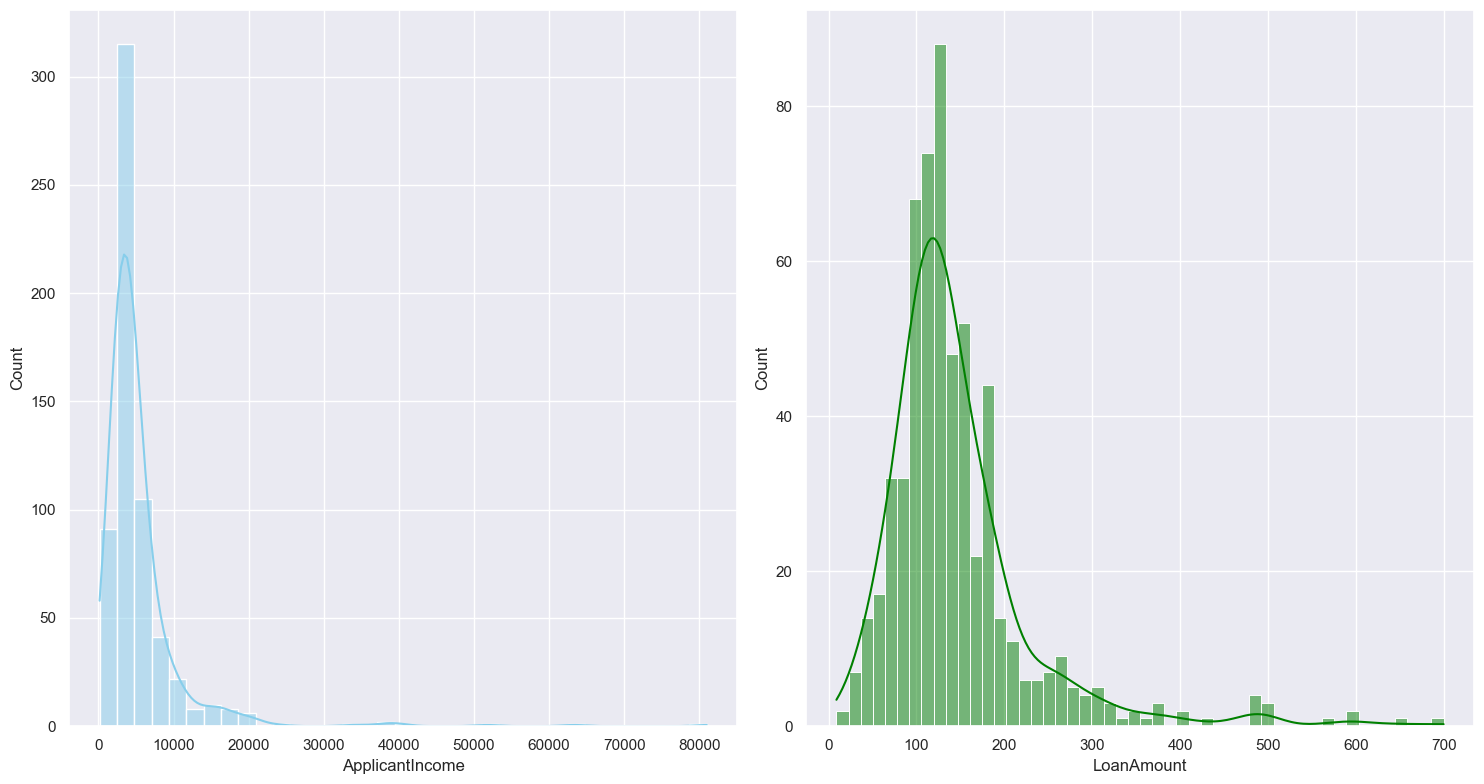

In [33]:
# Visualizing potential skewness in ApplicantIncome where the mean is closer to the 75%ile.
# 1-3 outliers of applicant income >50k likely give this dataset a rightward skew.

sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, color="skyblue", ax = axs[0], bins=35)
sns.histplot(data=df, x='LoanAmount', kde=True, color="green", ax=axs[1], bins=50)

fig.tight_layout()

- Look at box plots to understand the distributions.

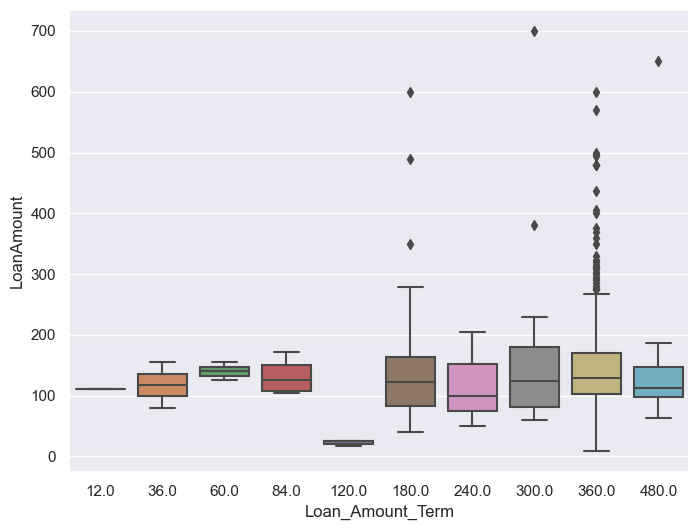

In [35]:
# Visualize boxplots to establish relationship between loan amount term and loan amount

sns.set(style='darkgrid')

var = 'Loan_Amount_Term'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=data)

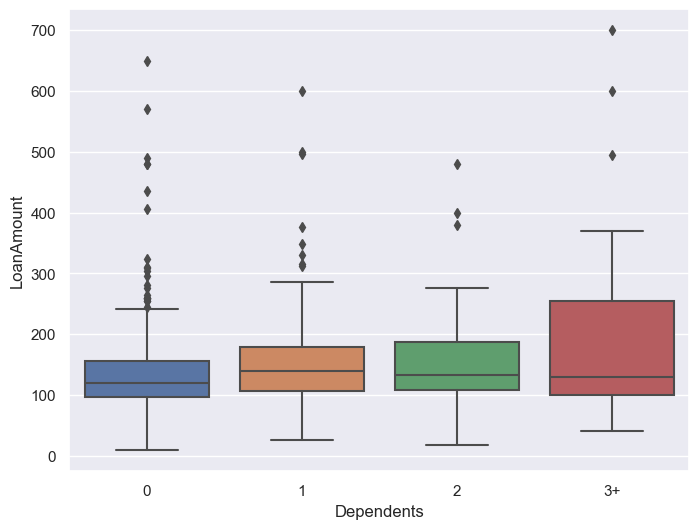

In [36]:
# Visualizing Dependents

sns.set(style='darkgrid')

var = 'Dependents'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=data)

### Categorical Variable Visualization

<AxesSubplot: xlabel='Gender', ylabel='ApplicantIncome'>

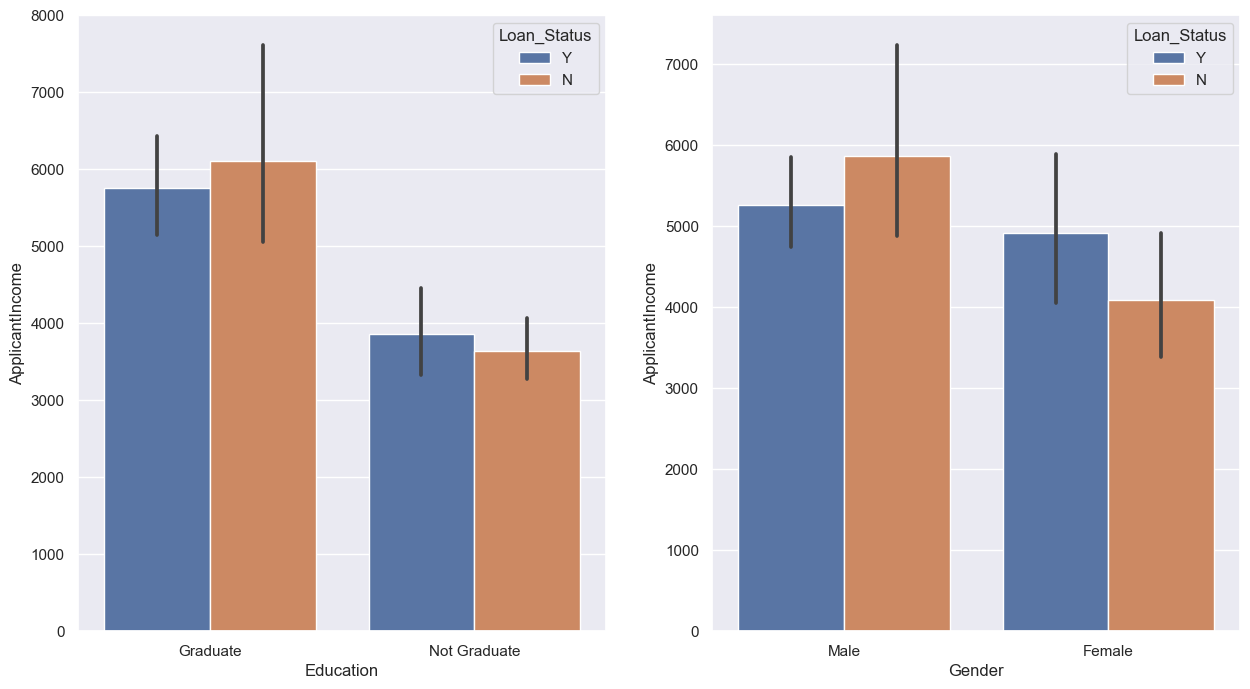

In [42]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(data=df, x="Education", y="ApplicantIncome", hue="Loan_Status", ax=axs[0])
sns.barplot(data=df, x="Gender", y="ApplicantIncome", hue="Loan_Status", ax=axs[1])

<AxesSubplot: xlabel='Dependents', ylabel='CoapplicantIncome'>

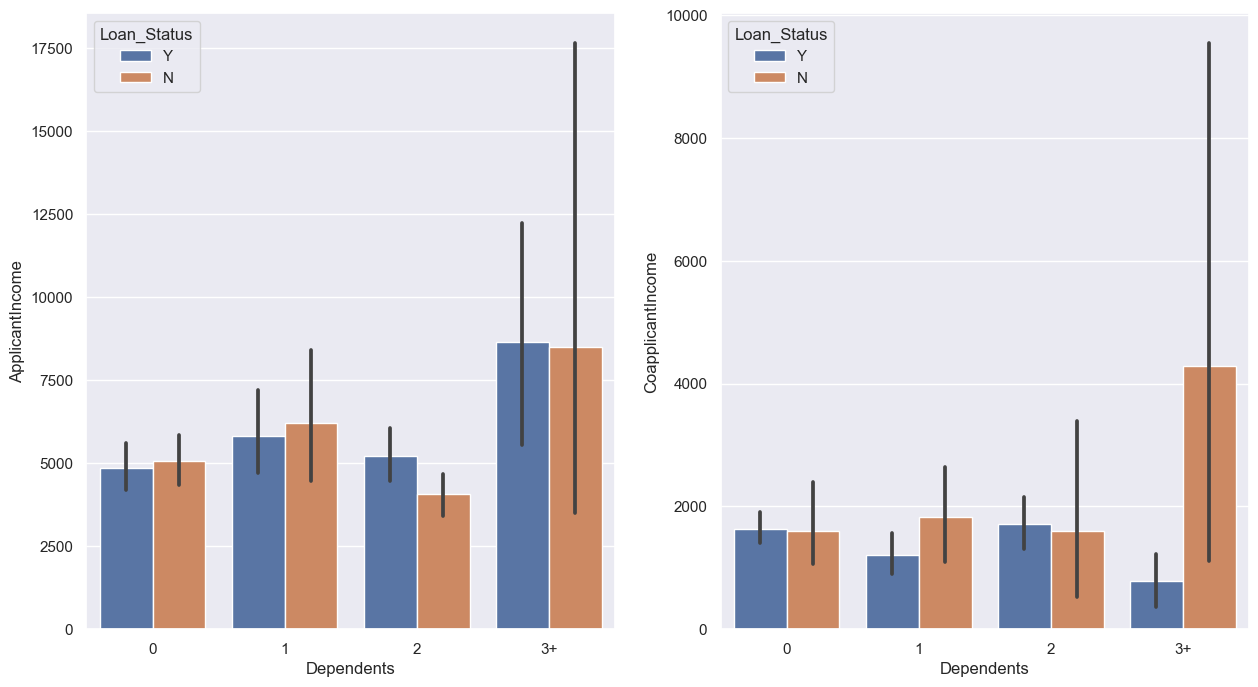

In [46]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(data=df, x="Dependents", y="ApplicantIncome", hue="Loan_Status", ax=axs[0])
sns.barplot(data=df, x="Dependents", y="CoapplicantIncome", hue="Loan_Status", ax=axs[1])

<AxesSubplot: xlabel='Self_Employed', ylabel='ApplicantIncome'>

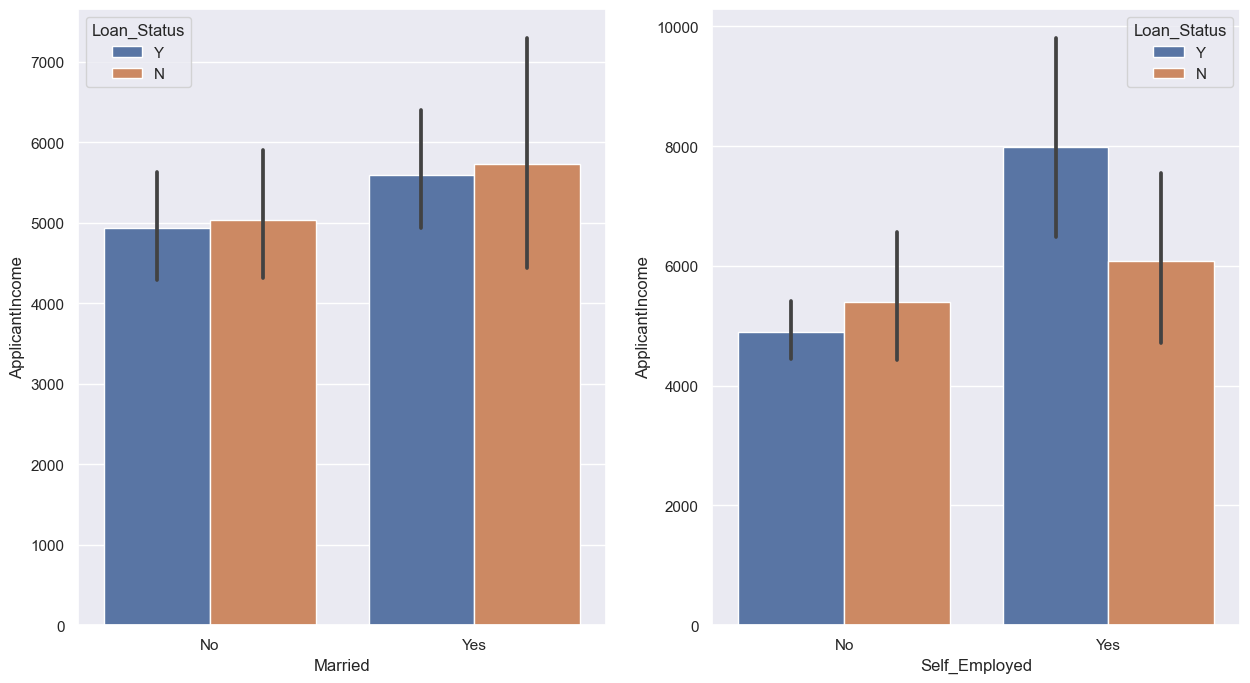

In [47]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(data=df, x="Married", y="ApplicantIncome", hue="Loan_Status", ax=axs[0])
sns.barplot(data=df, x="Self_Employed", y="ApplicantIncome", hue="Loan_Status", ax=axs[1])

#### There is larger loan amounts given out to applicants with a higher number of dependents.  The two categorical variables that stand out are higher coapplicant income with 3+ dependents being rejected far more often than accepted, and higher applicant income with no credit history being accepted far more often than rejected.

In [48]:
%store df
%store df_cat
%store df_num

Stored 'df' (DataFrame)
Stored 'df_cat' (DataFrame)
Stored 'df_num' (DataFrame)
